### Heart disease prediction project is studied by variuos Machine Learning approach. 

In [83]:
# import libraries for Credit Card Fraud Detection Project using Machine Learning:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , accuracy_score, classification_report

#### Import the Dataset of heart diesese

In [84]:
# Importing the Dataset
data = pd.read_csv("heart.csv")

### For each Attribute:(all numwric-valued)
#### 1. age
#### 2. sex (either male or female)
#### 3. cp value
#### 4. trestbps value
#### 5. Cholestral level
#### 6. fbs value
#### 7. restecg value
#### 8. thalach
#### 9. exang
#### 10. oldpeak
#### 11. slope
#### 12. ca
#### 13. thal
#### 14.target

In [85]:
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


#### Care of Missing values

In [86]:
data.isnull().head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [87]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

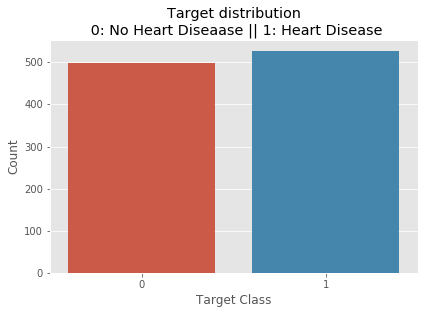

In [88]:
# labels= ["0", "1"]
# plt.figure(figsize=(6, 4))

sns.countplot(data['target'])
# sns.countplot(data['target'], hue=data['cp'])
plt.tight_layout()
plt.title("Target distribution\n 0: No Heart Diseaase || 1: Heart Disease")
# plt.xticks(range(2), labels)
plt.xlabel("Target Class")
plt.ylabel("Count")
# plt.legend(labels=["0- Heart disease", "1- No Heart Disease"])
plt.savefig("traget.png", bbox_inches='tight')
plt.show()

In [89]:
# Count the number of 0 and 1
data.groupby('target').size()

target
0    499
1    526
dtype: int64

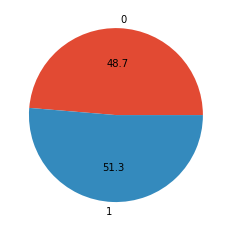

In [90]:
import pylab # import pylab becuz need to remove ylabel
data.groupby('target').size().plot(kind = 'pie', autopct = '%.1f')
pylab.ylabel('')
plt.savefig("percentage-target.png", bbox_inches='tight')

In [91]:
# Count the number of 0 and 1
data.groupby('sex').size()

sex
0    312
1    713
dtype: int64

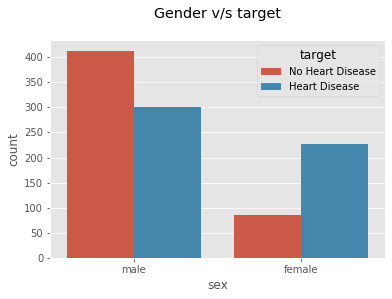

In [92]:
# sns.set_style('darkgrid')
# sns.set_palette('Set2')


df2 = data.copy()

def chng(sex):
    if sex == 0:
        return 'female'
    else:
        return 'male'
df2['sex'] = df2['sex'].apply(chng)

def chng2(prob):
    if prob == 0:
        return 'No Heart Disease'
    else:
        return 'Heart Disease'
df2['target'] = df2['target'].apply(chng2)



# df2['target'] = df2['target'].apply(chng2)
sns.countplot(data= df2, x='sex', hue='target')
plt.title('Gender v/s target\n')
plt.savefig("genVstarget.png", bbox_inches='tight')

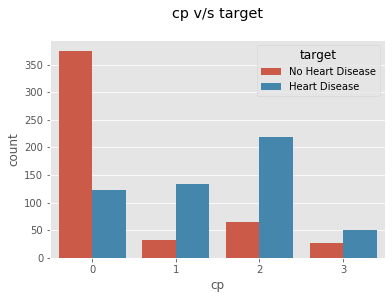

In [93]:
df2 = data.copy()

# def chng(sex):
#     if sex == 0:
#         return 'female'
#     else:
#         return 'male'
# df2['sex'] = df2['sex'].apply(chng)

def chng2(prob):
    if prob == 0:
        return 'No Heart Disease'
    else:
        return 'Heart Disease'
df2['target'] = df2['target'].apply(chng2)



# df2['target'] = df2['target'].apply(chng2)
sns.countplot(data= df2, x='cp', hue='target')
plt.title('cp v/s target\n')
plt.savefig("cpVstarget.png", bbox_inches='tight')

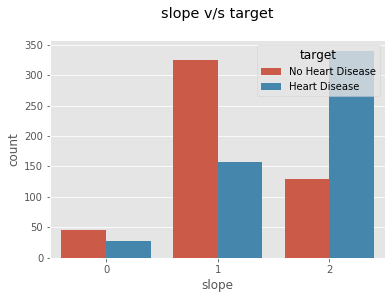

In [94]:
df2 = data.copy()

# def chng(sex):
#     if sex == 0:
#         return 'female' 
#     else:
#         return 'male'
# df2['sex'] = df2['sex'].apply(chng)

def chng2(prob):
    if prob == 0:
        return 'No Heart Disease'
    else:
        return 'Heart Disease'
df2['target'] = df2['target'].apply(chng2)



# df2['target'] = df2['target'].apply(chng2)
sns.countplot(data= df2, x='slope', hue='target')
plt.title('slope v/s target\n')
plt.savefig("slopehVstarget.png", bbox_inches='tight')

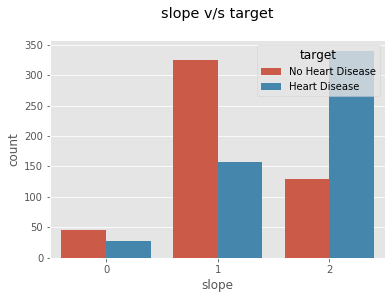

In [95]:
df2 = data.copy()

def chng2(prob):
    if prob == 0:
        return 'No Heart Disease'
    else:
        return 'Heart Disease'
df2['target'] = df2['target'].apply(chng2)



# df2['target'] = df2['target'].apply(chng2)
sns.countplot(data= df2, x='slope', hue='target')
plt.title('slope v/s target\n')
plt.savefig("slopehVstarget.png", bbox_inches='tight')

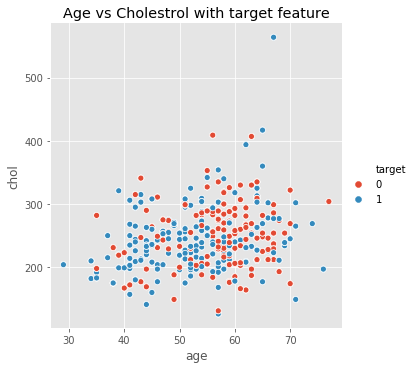

In [96]:
# visualize the data using seaborn:
sns.relplot(x = 'age' , y = 'chol' , hue = 'target', data = data)
plt.title('Age vs Cholestrol with target feature')
plt.savefig("age_chol.png", bbox_inches='tight')

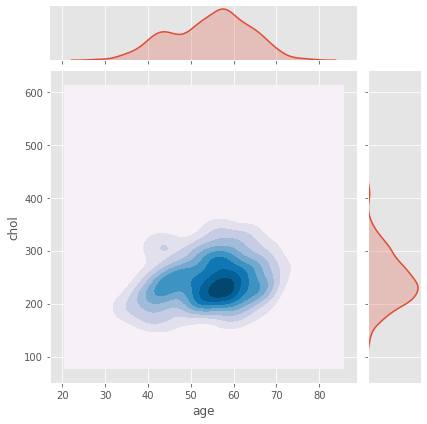

In [97]:
# Cholestrol vs Age:
sns.jointplot(data=data,
              x='age',
              y='chol',
              kind='kde',
              cmap='PuBu'
              )
plt.savefig("cholVsage.png", bbox_inches='tight')              

In [98]:
# # visualize the data using seaborn:
# sns.relplot(x = 'sex' , y = 'chol' , hue = 'target', data = data)
# plt.title('Sex vs Cholestrol by 0 and 1')
# plt.savefig("sex_chol.png", bbox_inches='tight')

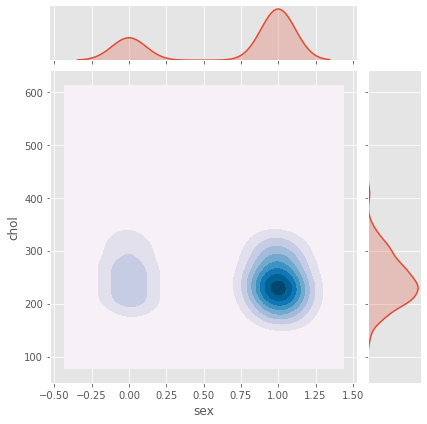

In [99]:
# Cholestrol vs Sex:
sns.jointplot(data=data,
              x='sex',
              y='chol',
              kind='kde',
              cmap='PuBu'
              )
plt.savefig("cholVssex.png", bbox_inches='tight')              

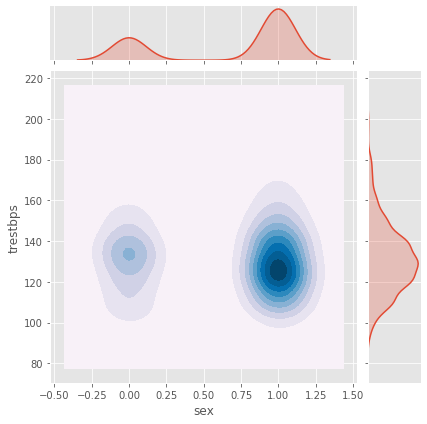

In [100]:
# Cholestrol vs Sex:
sns.jointplot(data=data,
              x='sex',
              y='trestbps',
              kind='kde',
              cmap='PuBu'
              )

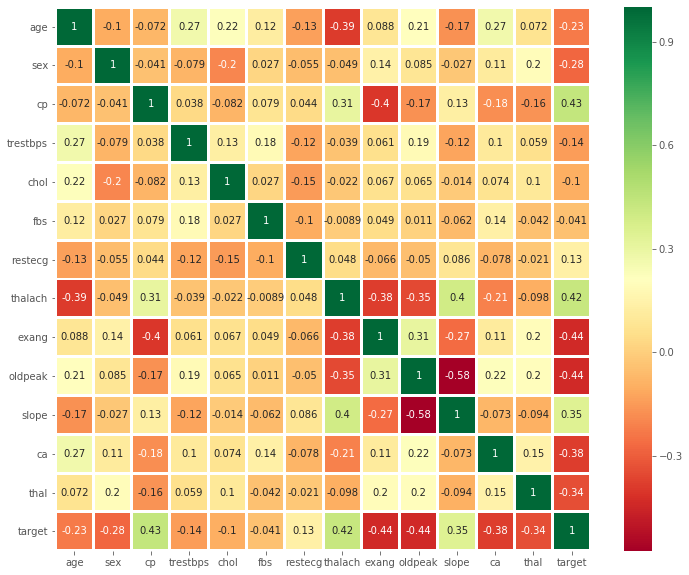

In [101]:
plt.figure(figsize=(12,10))
# seaborn has an easy method to showcase heatmap
p = sns.heatmap(data.corr(), annot=True, linewidth=2, cmap ='RdYlGn')
plt.tight_layout
plt.savefig("correlation.png", bbox_inches='tight')

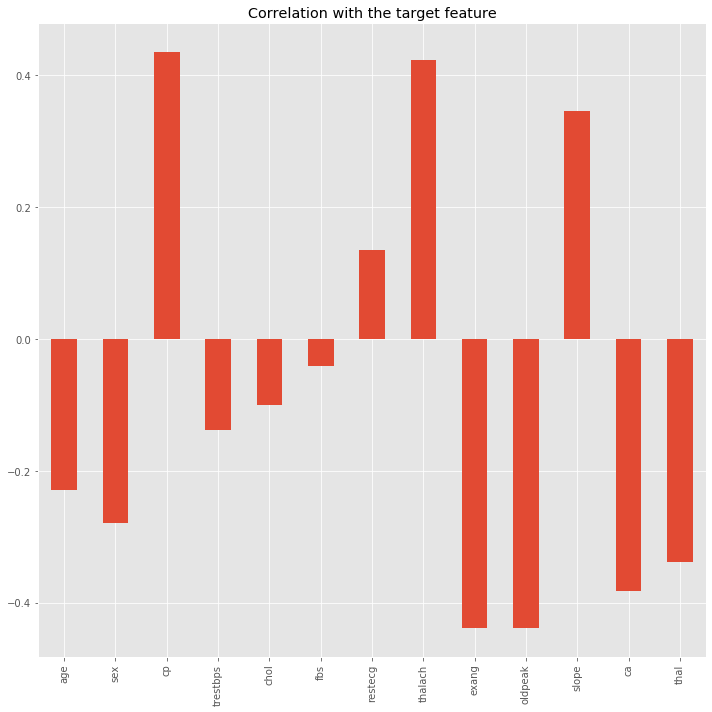

In [102]:
data.drop('target', axis=1).corrwith(data.target).plot(kind='bar', grid=True, figsize=(10, 10), 
                                                        title="Correlation with the target feature")
plt.tight_layout()
plt.savefig("corr_target.png", bbox_inches='tight')

#### Strong correlation

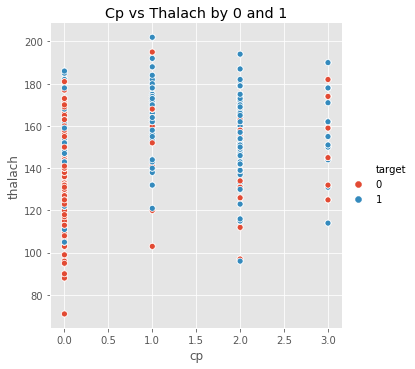

In [103]:
# visualize the data using seaborn:
sns.relplot(x = 'cp' , y = 'thalach' , hue = 'target', data = data)
plt.title('Cp vs Thalach by 0 and 1')
plt.savefig("cp_thalach.png", bbox_inches='tight')

### Taking care of Duplicate Values 

In [104]:
data_dup = data.duplicated().any()
data_dup

True

In [105]:
# drop the duplicate data 
data = data.drop_duplicates()

# Chheck the duplicate values
data_dup = data.duplicated().any()
data_dup

False

#### Prepocessing: Data Processing

In [106]:
cate_val =[]
cont_val =[]

for column in data.columns:
    if data[column].nunique() <= 10:
        cate_val.append(column)
    else:
        cont_val.append(column)    


In [107]:
# Categorical columns
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [108]:
# numerical columns
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

### Encoding Categorical Data:

In [109]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [110]:
# the unique values of cp column
data["cp"].unique()

array([0, 1, 2, 3])

In [111]:
# Remove sex column and terget column because it already have 0 and 1. Encoding is not required here
cate_val.remove('sex')
cate_val.remove('target')

# dummies all categorical vaues
data = pd.get_dummies(data, columns= cate_val, drop_first= True)
data.head(5)

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


### Feature scaling

In [112]:
from sklearn.preprocessing import StandardScaler

In [113]:
st = StandardScaler()
data[cont_val] = st.fit_transform(data[cont_val])

data.head(5)

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


#### Spiliting the dataset inti the Training set and test set

In [114]:
# Dependent variables
X = data.drop('target', axis=1)
X.head(5)

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0


In [115]:
# Independent variables
y = data['target']
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [116]:
# now to perform train and test split
from sklearn.model_selection import train_test_split


In [117]:
X_train, X_test, y_train, y_test= train_test_split (X, y, test_size=0.2, random_state=40)

X_train.head(5)

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
75,-0.821493,1,0.364848,0.203222,0.281229,-0.899544,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
144,-0.821493,1,-1.117961,-0.822564,-0.287311,-0.813302,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
52,-1.817842,1,0.364848,-1.383842,1.024705,-0.899544,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
17,-0.046555,1,-0.433587,0.377412,-1.774263,0.997780,0,0,0,0,...,1,1,0,1,0,0,0,0,0,1
58,1.392616,1,1.163283,-0.667728,0.018826,-0.209608,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1


In [118]:
y_train.head(5)

75     1
144    1
52     1
17     0
58     0
Name: target, dtype: int64

In [119]:
X_test.head(5)

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
19,0.396267,1,0.478910,-0.687083,0.674834,-0.899544,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0
137,1.060500,0,2.760154,1.519323,0.193761,-0.899544,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
119,-1.375021,1,-0.661712,0.938690,0.543632,-0.899544,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
361,0.839089,1,-0.091401,-0.299994,-0.156110,0.652812,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
106,-0.378671,1,0.478910,1.016108,1.024705,0.480328,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1


In [120]:
y_test.head(5)

19     1
137    1
119    1
361    1
106    0
Name: target, dtype: int64

### Logistic Regression

In [121]:
data.head(5)

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [122]:
# Traget is based on classificaion problem
# import Logistic Regression 
from sklearn.linear_model import LogisticRegression

In [123]:
log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [124]:
# prediction the y value
y_pred_log = log.predict(X_test)
y_pred_log

array([1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1])

In [125]:
# accuracy_score import from sklearn
from sklearn.metrics import accuracy_score
# accuracy between y_test and y_predict by Logistic Regression
accuracy_score(y_test, y_pred_log)

0.9508196721311475

In [126]:
from sklearn.metrics import classification_report, confusion_matrix

cf_matrix_log = confusion_matrix(y_test, y_pred_log)
#print(cf_matrix)
print(classification_report(y_test,y_pred_log))

             precision    recall  f1-score   support

          0       0.94      0.97      0.96        34
          1       0.96      0.93      0.94        27

avg / total       0.95      0.95      0.95        61



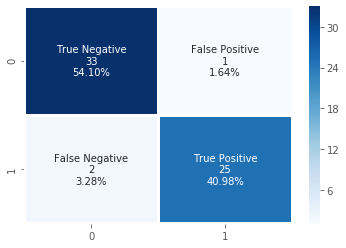

In [171]:
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix_log.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix_log.flatten()/np.sum(cf_matrix_log)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_log, annot=labels, fmt='', linewidths=2 ,cmap='Blues')
plt.savefig("confuMatrix_LR.png", bbox_inches='tight')

### Support vector classifier (SVC)

In [128]:
# import support vector machine
from sklearn import svm

In [129]:
svm = svm.SVC()
svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [130]:
#predict
y_pred_svc = svm.predict(X_test)
y_pred_svc

array([1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1])

In [131]:
# Accuracy test by SVC
accuracy_score(y_test, y_pred_svc)

0.9016393442622951

In [155]:
from sklearn.metrics import classification_report, confusion_matrix

cf_matrix_svc = confusion_matrix(y_test, y_pred_svc)
#print(cf_matrix)
print(classification_report(y_test, y_pred_svc))

             precision    recall  f1-score   support

          0       0.94      0.88      0.91        34
          1       0.86      0.93      0.89        27

avg / total       0.90      0.90      0.90        61



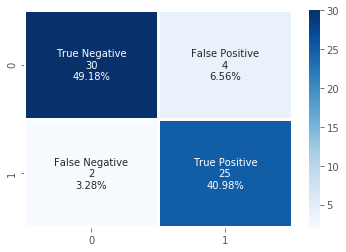

In [172]:
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix_svc.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix_svc.flatten()/np.sum(cf_matrix_svc)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_svc, annot=labels, fmt='', linewidths=2 ,cmap='Blues')
plt.savefig("confuMatrix_SVM.png", bbox_inches='tight')

### KNeighbors Classifiers

In [132]:
from sklearn.neighbors import KNeighborsClassifier

In [133]:
knn = KNeighborsClassifier(n_neighbors=2)

In [134]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [135]:
y_pred_knn = knn.predict(X_test)
y_pred_knn

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1])

In [136]:
accuracy_score(y_test, y_pred_knn)

0.8688524590163934

In [137]:
score = []

for k in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=2)
    knn.fit(X_train, y_train)
    y_pred_knn= knn.predict(X_test)
    score.append(accuracy_score(y_test, y_pred_knn))

In [157]:
from sklearn.metrics import classification_report, confusion_matrix

cf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
#print(cf_matrix)
print(classification_report(y_test, y_pred_knn))

             precision    recall  f1-score   support

          0       0.82      0.97      0.89        34
          1       0.95      0.74      0.83        27

avg / total       0.88      0.87      0.87        61



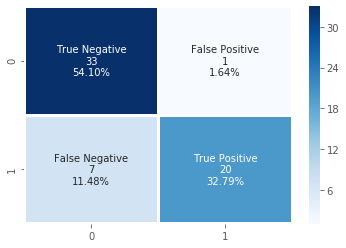

In [173]:
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix_knn.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix_knn.flatten()/np.sum(cf_matrix_knn)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_knn, annot=labels, fmt='', linewidths=2 ,cmap='Blues')
plt.savefig("confuMatrix_KNN.png", bbox_inches='tight')

### Non_Linear Algorithms
#### not required to perform feature and encoding scalling


#### Decision Tree Classifier

In [164]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [165]:
y_pred_dt= dt.predict(X_test)
y_pred_dt

array([1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1])

In [167]:
#check accuracy test by Dicision tree
accuracy_score(y_test, y_pred_dt)

0.7377049180327869

In [168]:
from sklearn.metrics import classification_report, confusion_matrix

cf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
#print(cf_matrix)
print(classification_report(y_test, y_pred_dt))

             precision    recall  f1-score   support

          0       0.78      0.74      0.76        34
          1       0.69      0.74      0.71        27

avg / total       0.74      0.74      0.74        61



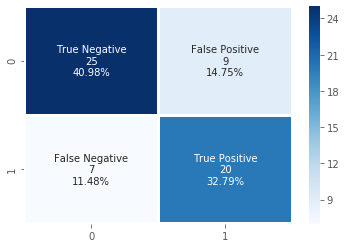

In [170]:
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix_dt.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix_dt.flatten()/np.sum(cf_matrix_dt)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_dt, annot=labels, fmt='', linewidths=2 ,cmap='Blues')
plt.savefig("confuMatrix_DT.png", bbox_inches='tight')

#### Random Forest

In [142]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [143]:
y_pred_rf = rf.predict(X_test)
y_pred_rf

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1])

In [144]:
## Accuracy test by Randon Forest
accuracy_score(y_test, y_pred_rf)

0.8360655737704918

In [159]:
from sklearn.metrics import classification_report, confusion_matrix

cf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
#print(cf_matrix)
print(classification_report(y_test, y_pred_rf))

             precision    recall  f1-score   support

          0       0.82      0.91      0.86        34
          1       0.87      0.74      0.80        27

avg / total       0.84      0.84      0.83        61



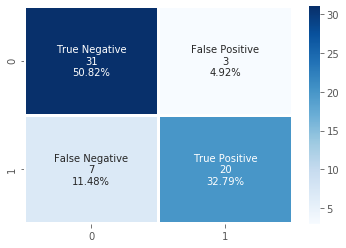

In [174]:
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix_rf.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix_rf.flatten()/np.sum(cf_matrix_rf)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_rf, annot=labels, fmt='', linewidths=2 ,cmap='Blues')
plt.savefig("confuMatrix_RF.png", bbox_inches='tight')

#### Gradient Boosting Classifieer

In [145]:
from sklearn.ensemble import GradientBoostingClassifier

gbc =GradientBoostingClassifier()
gbc.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [146]:
# perform prediction by GBC
y_pred_gbc= gbc.predict(X_test)
y_pred_gbc

array([1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1])

In [147]:
accuracy_score(y_test, y_pred_gbc)

0.8032786885245902

In [162]:
from sklearn.metrics import classification_report, confusion_matrix

cf_matrix_gbc = confusion_matrix(y_test, y_pred_gbc)
#print(cf_matrix)
print(classification_report(y_test, y_pred_gbc))

             precision    recall  f1-score   support

          0       0.84      0.79      0.82        34
          1       0.76      0.81      0.79        27

avg / total       0.81      0.80      0.80        61



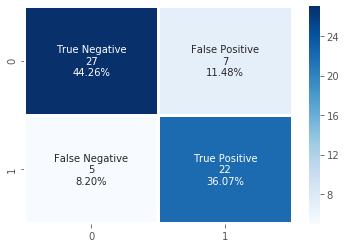

In [175]:
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix_gbc.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix_gbc.flatten()/np.sum(cf_matrix_gbc)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_gbc, annot=labels, fmt='', linewidths=2 ,cmap='Blues')
plt.savefig("confuMatrix_GB.png", bbox_inches='tight')

##### Make a data frame by models score

In [148]:
final_data = pd.DataFrame({'Models': ['LR', 'SVC', 'KNN', 'RF', 'GBC'], 'ACC': [accuracy_score(y_test, y_pred_log),  accuracy_score(y_test, y_pred_svc), accuracy_score(y_test, y_pred_knn), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_gbc)]})

In [149]:
# Let see the models predictions
final_data

,Models,ACC
0,LR,0.950820
1,SVC,0.901639
2,KNN,0.868852
3,RF,0.836066
4,GBC,0.803279


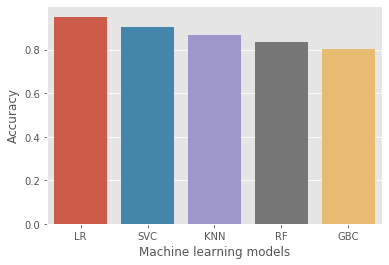

In [150]:
sns.barplot(final_data['Models'], final_data['ACC'])
plt.xlabel("Machine learning models")
plt.ylabel("Accuracy")
plt.savefig("accuracy-plot.png", bbox_inches='tight')

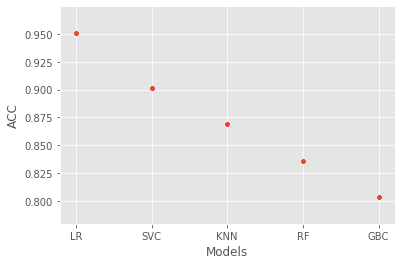

In [151]:
sns.scatterplot(final_data['Models'], final_data['ACC'])

# Lets check for hart disese or not by Logistic Regression

### Prediction on New data

In [152]:
new_data = pd.DataFrame({
    'age':80,
    'sex':0,
    'cp':0,
    'trestbps':100,
    'chol': 200,
    'fbs':0,
    'restecg':1,
    'thalach':150,
    'exang':0,
    'oldpeak':1.0,
    'slope':2,
    'ca':1,
    'thal':1,
    }, index=[0])

In [153]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,80,0,0,100,200,0,1,150,0,1.0,2,1,1


In [154]:
# Now check:
p = log.predict(new_data)
if p[0] == 0:
    print("NO Diesesa")
else:
    print("Disease")    

ValueError: X has 13 features per sample; expecting 22

### Thus project design by Khalid Hossen, MSc(thesis), Scientific Computing, Memorial University, Canada.